# Statistical Analysis
This is the statistical analysis of the data that we get from the GDELT dataset from the first step  **1. Retrieve Data**, All of the data contain two tables `events` and `gkg` which have already imported to the SQL database.

Before start this notebook, please make sure to complete this following list:
- Install [XAMPP](https://www.apachefriends.org/index.html)
- Start MySQL Database, and Apache Webserver
- Install Package `SQLAlchemy` on notebook, this package contains a pure-Python MySQL client library
- Import database `/data/gdelt_id_data.sql.zip` to MySQL Database

## Getting Data from SQL

In [4]:
import pymysql
import pandas as pd
from pandas import DataFrame
from sqlalchemy import create_engine

host = '127.0.0.1'
port = "3306"
user = 'root'
password = ''
database = 'gdelt_id_data'

'''
conn = pymysql.connect(
    host=host,
    port=int(port),
    user=user,
    passwd=password,
    db=database,
    charset='utf8mb4')
'''

# Create Connection to database
engine = create_engine('mysql+pymysql://'+user+':'+password+'@'+host+':'+port+'/'+database)
#engine = create_engine('mysql+pymysql://root: @localhost:3306/gdelt_id_data')

def run(sql):
    df = pd.read_sql_query(sql, engine)
    return df

In [5]:
# create object for each table
events = pd.read_sql_table('gdelt_events', engine )
gkg = pd.read_sql_table('gdelt_gkg', engine )

In [6]:
events.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,798765394,20171031,201710,2017,2017.8247,MNCUSA,BOEING,USA,NaN,None,...,None,4,"Jakarta, Jakarta Raya, Indonesia",ID,ID04,-6.17444,106.829,-2679652,20181031,https://www.couriermail.com.au/news/lion-air-p...
1,798765710,20181031,201810,2018,2018.8247,None,None,None,NaN,None,...,-2690876,4,"Pangkalpinang, Indonesia (general), Indonesia",ID,ID00,-2.13333,106.133,-2690876,20181031,https://www.republika.co.id/berita/en/national...
2,798765711,20181031,201810,2018,2018.8247,None,None,None,NaN,None,...,-2679652,4,"Jakarta, Jakarta Raya, Indonesia",ID,ID04,-6.17444,106.829,-2679652,20181031,https://www.technomag.co.zw/2018/10/30/latest-...
3,798765712,20181031,201810,2018,2018.8247,None,None,None,NaN,None,...,-2690876,4,"Pangkalpinang, Indonesia (general), Indonesia",ID,ID00,-2.13333,106.133,-2690876,20181031,https://www.republika.co.id/berita/en/national...
4,798765713,20181031,201810,2018,2018.8247,None,None,None,NaN,None,...,-2690876,4,"Pangkalpinang, Indonesia (general), Indonesia",ID,ID00,-2.13333,106.133,-2690876,20181031,https://www.republika.co.id/berita/en/national...


In [7]:
gkg.head()

,DATE,NUMARTS,COUNTTYPE,NUMBER,OBJECTTYPE,GEO_TYPE,GEO_FULLNAME,GEO_COUNTRYCODE,GEO_ADM1CODE,GEO_LAT,GEO_LONG,GEO_FEATUREID,CAMEOEVENTIDS,SOURCES,SOURCEURLS
0,20181031,1,CRISISLEX_T02_INJURED,4,None,1,Indonesia,ID,ID,-5.00000,120.000,ID,None,en.ce.cn,http://en.ce.cn/World/big-news/201810/31/t2018...
1,20181031,1,CRISISLEX_T03_DEAD,121,None,4,"Jakarta, Jakarta Raya, Indonesia",ID,ID04,-6.17444,106.829,-2679652,"798789809,798790134,798790149,798790150,798791...",siasat.com,https://www.siasat.com/news/indonesias-deadlie...
2,20181031,2,CRISISLEX_T03_DEAD,15,None,4,"Tanjung Karawang, Jawa Barat, Indonesia",ID,ID30,-5.92611,107.003,-2681536,None,en.tempo.co;en.tempo.co,http://en.tempo.co/read/news/2018/10/31/056923...
3,20181031,1,AFFECT,200,amilies,1,Indonesia,ID,ID,-5.00000,120.000,ID,"798939629,798941414,798941415,798941416",reliefweb.int,https://reliefweb.int/report/indonesia/how-car...
4,20181031,3,CRISISLEX_CRISISLEXREC,7,None,4,"Jakarta, Jakarta Raya, Indonesia",ID,ID04,-6.17444,106.829,-2679652,"798851144,798851240,798851241,798851250,798826...",businessinsider.com.au;msn.com;businessinsider...,https://www.businessinsider.com.au/the-10-most...


## Descriptive Statistic

In [8]:
print("Shape of data events :", events.shape)
print("Shape of data gkg :", gkg.shape)

Shape of data events : (283792, 58)
Shape of data gkg : (70580, 15)


### - Shape of data
The **events** data consist of `283.792` rows and `58` columns

The **gkg** data consist of `70.580` rows and `15` columns

### - Total data recorded each month

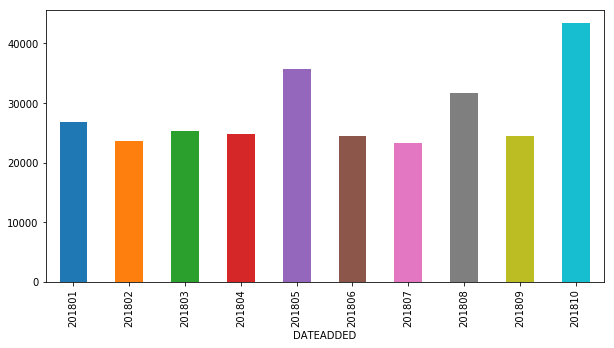

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))

# get events months
months = events.DATEADDED.apply(str).str[0:6]

# plot data each months
events.groupby(months).size().plot(kind='bar')

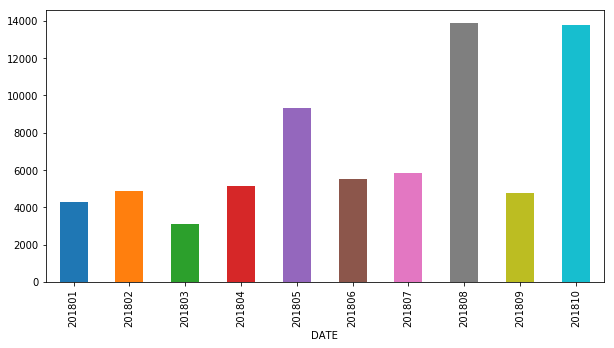

In [41]:
fig, ax = plt.subplots(figsize=(10,5))

# get gkg months
months = gkg.DATE.apply(str).str[0:6]

# plot data each months
gkg.groupby(months).size().plot(kind='bar')